In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime


In [14]:
df = pd.read_csv('/customer_churn.csv')

In [15]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [17]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [18]:
print(df.isnull().sum())

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64


In [19]:
df['Onboard_date'] = pd.to_datetime(df['Onboard_date'])
print(f"Converted 'Onboard_date' to datetime. Dtype: {df['Onboard_date'].dtype}")

Converted 'Onboard_date' to datetime. Dtype: datetime64[ns]


In [20]:
df['Tenure_Days'] = (datetime.datetime.now() - df['Onboard_date']).dt.days
print("Created 'Tenure_Days' feature.")

Created 'Tenure_Days' feature.


In [21]:
df = df.drop('Onboard_date', axis=1)


In [22]:
for col in ['Age', 'Total_Purchase', 'Years', 'Num_Sites', 'Tenure_Days']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [23]:
df = df.drop(['Names', 'Location', 'Company'], axis=1)

In [24]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"\nOverall Churn Rate:\n{churn_rate}")


Overall Churn Rate:
Churn
0    83.333333
1    16.666667
Name: proportion, dtype: float64


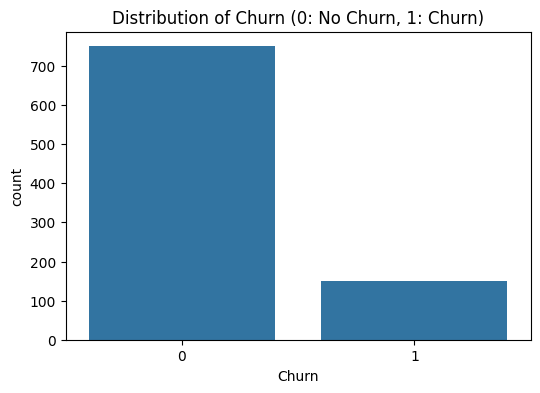

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn (0: No Churn, 1: Churn)')
plt.show()

# Churn by Account Manager

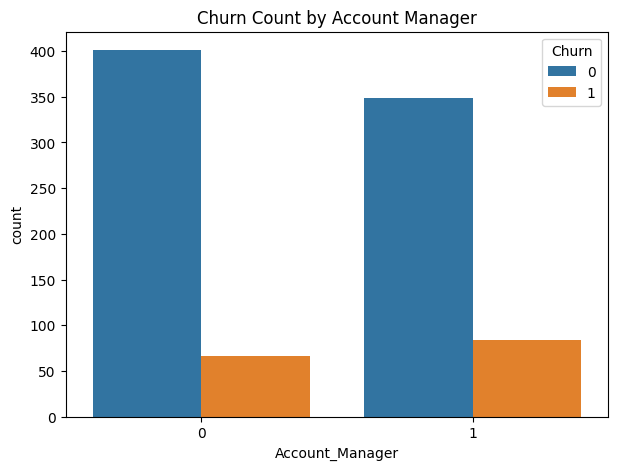


Churn Rate by Account Manager:
Churn                    0          1
Account_Manager                      
0                85.867238  14.132762
1                80.600462  19.399538


In [26]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Account_Manager', hue='Churn', data=df)
plt.title('Churn Count by Account Manager')
plt.show()
print("\nChurn Rate by Account Manager:")
print(df.groupby('Account_Manager')['Churn'].value_counts(normalize=True).unstack() * 100)

# Distribution of numerical features by Churn

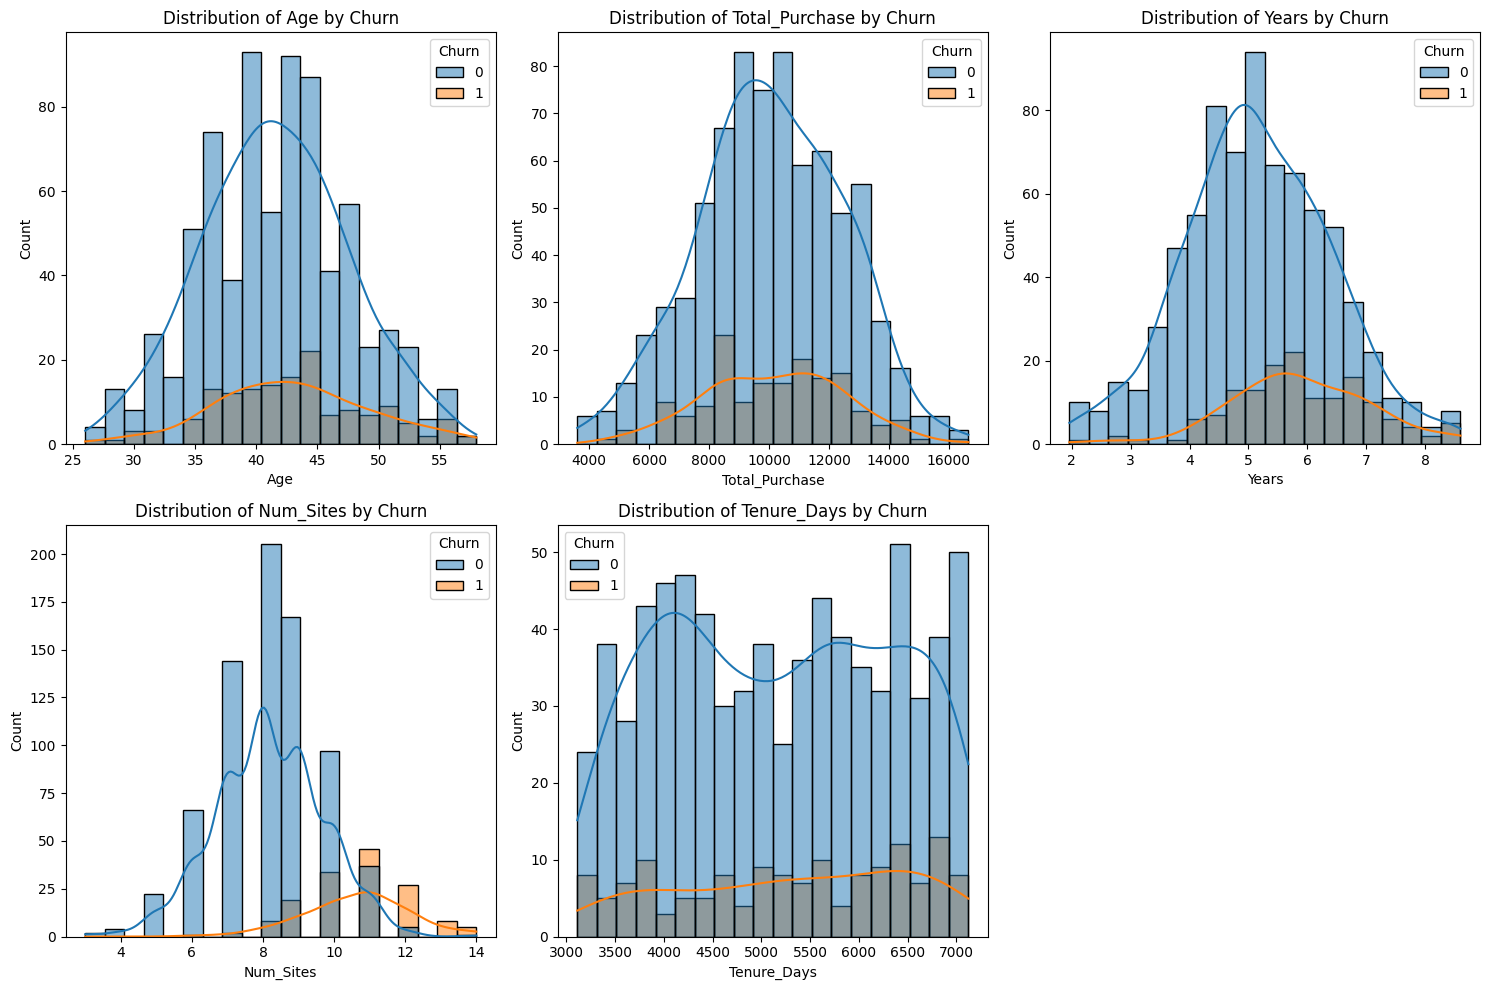

In [27]:
numerical_cols = ['Age', 'Total_Purchase', 'Years', 'Num_Sites', 'Tenure_Days']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=20)
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()

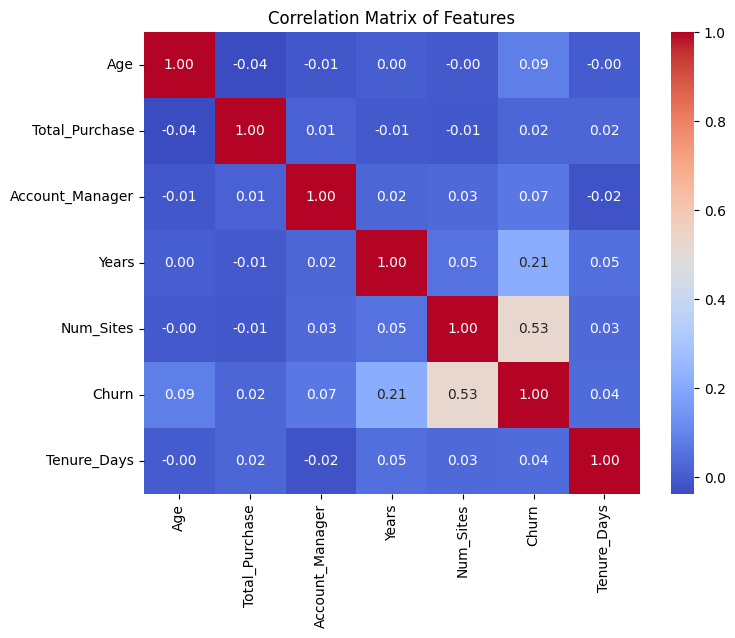

In [28]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [29]:
# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [31]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Data split into training (X_train: {X_train.shape}, y_train: {y_train.shape}) and testing (X_test: {X_test.shape}, y_test: {y_test.shape}) sets.")

Data split into training (X_train: (675, 6), y_train: (675,)) and testing (X_test: (225, 6), y_test: (225,)) sets.


In [33]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [38]:

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] # Probability of churn

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print("  Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("  Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Performance:
  Accuracy: 0.9067
  Precision: 0.8077
  Recall: 0.5676
  F1-Score: 0.6667
  ROC-AUC: 0.9304
  Confusion Matrix:
[[183   5]
 [ 16  21]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       188
           1       0.81      0.57      0.67        37

    accuracy                           0.91       225
   macro avg       0.86      0.77      0.81       225
weighted avg       0.90      0.91      0.90       225


Training Decision Tree...
Decision Tree Performance:
  Accuracy: 0.8133
  Precision: 0.4324
  Recall: 0.4324
  F1-Score: 0.4324
  ROC-AUC: 0.6604
  Confusion Matrix:
[[167  21]
 [ 21  16]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       188
           1       0.43      0.43      0.43        37

    accuracy                           0.81       225
   macro avg 

In [39]:
# Compare models
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.906667   0.807692  0.567568  0.666667  0.930420
Decision Tree        0.813333   0.432432  0.432432  0.432432  0.660365
Random Forest        0.880000   0.708333  0.459459  0.557377  0.905334



--- 6. Feature Importance ---

Random Forest Feature Importances:
Num_Sites          0.348585
Years              0.212138
Tenure_Days        0.159193
Total_Purchase     0.135631
Age                0.117740
Account_Manager    0.026712
dtype: float64


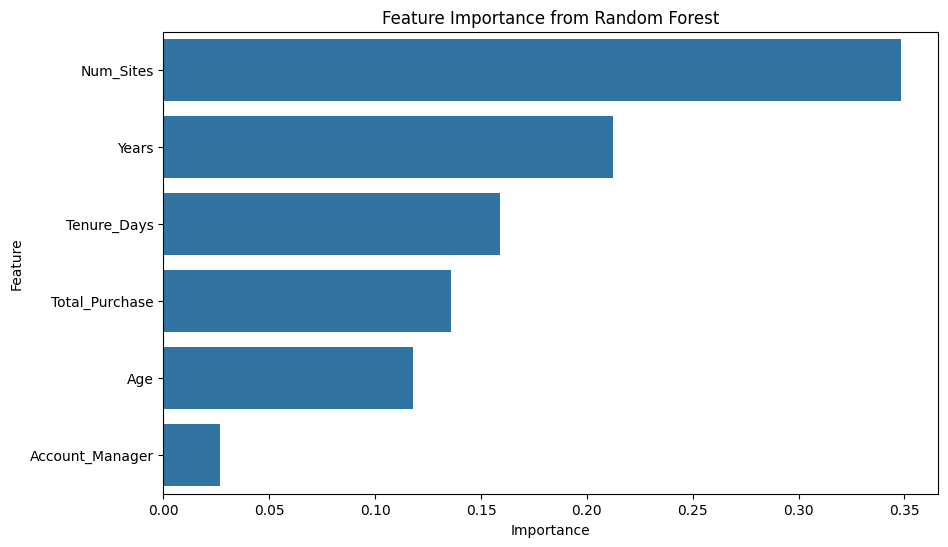

In [40]:
#  Feature Importance (for tree-based models)
print("\n--- 6. Feature Importance ---")
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nRandom Forest Feature Importances:")
    print(feature_importances)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

In [44]:
#  Actionable Insights & Recommendations
print(" Actionable Insights & Recommendations ")
print("Based on this analysis, here are potential actionable insights:")
print("1. Churn Drivers: Features like 'Num_Sites', 'Tenure_Days'and 'Years' are often significant predictors of churn. Deeper analysis into specific thresholds or interactions between these features could reveal critical churn points.")
print("2. Account Manager Impact: If 'Account_Manager' shows a significant difference in churn rates, investigate the practices of high-churn vs. low-churn managers to identify best practices or areas for training.")
print("3. Proactive Retention: Use the best-performing model (e.g., Random Forest) to predict churn probability for current customers. Prioritize outreach to high-risk customers with personalized retention offers (e.g., discounts, feature upgrades, dedicated support).")
print("4. Onboarding & Early Engagement: 'Tenure_Days' (derived from 'Onboard_date') is crucial. Customers churning early might indicate issues with onboarding or initial product experience. Focus on improving the first few weeks/months of customer journey.")
print("5. Product Usage: 'Num_Sites' can indicate product stickiness. Encourage customers to adopt more features or integrate with more of their systems to increase their reliance on the service.")


 Actionable Insights & Recommendations 
Based on this analysis, here are potential actionable insights:
1. Churn Drivers: Features like 'Num_Sites', 'Tenure_Days'and 'Years' are often significant predictors of churn. Deeper analysis into specific thresholds or interactions between these features could reveal critical churn points.
2. Account Manager Impact: If 'Account_Manager' shows a significant difference in churn rates, investigate the practices of high-churn vs. low-churn managers to identify best practices or areas for training.
3. Proactive Retention: Use the best-performing model (e.g., Random Forest) to predict churn probability for current customers. Prioritize outreach to high-risk customers with personalized retention offers (e.g., discounts, feature upgrades, dedicated support).
4. Onboarding & Early Engagement: 'Tenure_Days' (derived from 'Onboard_date') is crucial. Customers churning early might indicate issues with onboarding or initial product experience. Focus on impr